In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("atlantic.csv")
df.head()

,ID,Name,Date,Time,Event,Status,Latitude,Longitude,Maximum Wind,Minimum Pressure,...,Low Wind SW,Low Wind NW,Moderate Wind NE,Moderate Wind SE,Moderate Wind SW,Moderate Wind NW,High Wind NE,High Wind SE,High Wind SW,High Wind NW
0,AL011851,UNNAMED,18510625,0,,HU,28.0N,94.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
1,AL011851,UNNAMED,18510625,600,,HU,28.0N,95.4W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
2,AL011851,UNNAMED,18510625,1200,,HU,28.0N,96.0W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
3,AL011851,UNNAMED,18510625,1800,,HU,28.1N,96.5W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999
4,AL011851,UNNAMED,18510625,2100,L,HU,28.2N,96.8W,80,-999,...,-999,-999,-999,-999,-999,-999,-999,-999,-999,-999


In [3]:
df.columns

Index(['ID', 'Name', 'Date', 'Time', 'Event', 'Status', 'Latitude',
       'Longitude', 'Maximum Wind', 'Minimum Pressure', 'Low Wind NE',
       'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE',
       'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW',
       'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW'],
      dtype='object')

In [4]:
df['Date'] = pd.to_datetime(df['Date'],format="%Y%m%d")

In [5]:
df['Date'].head()

0   1851-06-25
1   1851-06-25
2   1851-06-25
3   1851-06-25
4   1851-06-25
Name: Date, dtype: datetime64[ns]

In [6]:
from  datetime import date

In [7]:
two_hurricane_date = [date(2016,10,7),date(2017,6,21)]

In [8]:
two_hurricane_date[0].year
two_hurricane_date[0].weekday(   )

4

In [9]:
from datetime import timedelta

td = timedelta(days=29)

In [10]:
print(td+two_hurricane_date[0])

2016-11-05


In [11]:
hurricane_each_months = {1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0}

for hurricane in df['Date']:
    month = hurricane.month

    hurricane_each_months[month] += 1

print(hurricane_each_months)

{1: 132, 2: 13, 3: 14, 4: 81, 5: 655, 6: 2349, 7: 3262, 8: 10857, 9: 18926, 10: 9802, 11: 2548, 12: 466}


In [12]:
hurricane_months = pd.DataFrame.from_dict(hurricane_each_months,orient='index', columns=['value'])
hurricane_months.index.name = 'Month'

In [13]:
hurricane_months.reset_index(inplace=True)

In [14]:
hurricane_months['Month'] = pd.to_datetime(hurricane_months['Month'],format="%m")

In [15]:
hurricane_months['Month'] = hurricane_months['Month'].dt.strftime("%B")

In [16]:
hurricane_months.head()

,Month,value
0,January,132
1,February,13
2,March,14
3,April,81
4,May,655


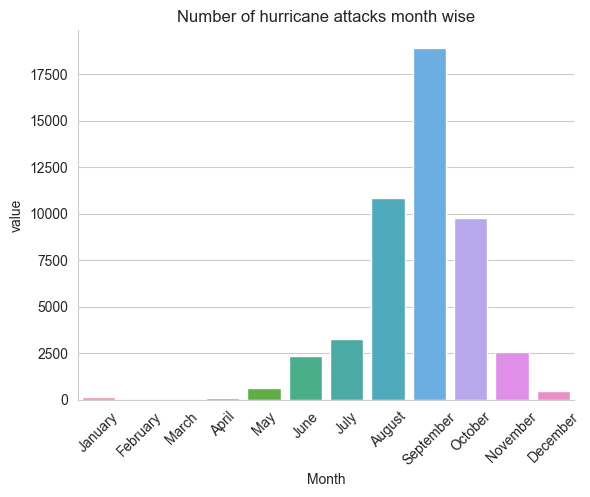

In [17]:
sns.set_style("whitegrid")
sns.barplot(data=hurricane_months,x="Month",y="value")
plt.xticks(rotation = 45)
plt.title("Number of hurricane attacks month wise")
sns.despine()
plt.show()

### Most of the hurricane attacks happend on second half of the year most of the attacks happend on September month

In [18]:
hurricane_each_day = {0:0,1:0,2:0,3:0,4:0,5:0,6:0}

In [19]:
for hurricane in df['Date']:
    day = hurricane.weekday()

    hurricane_each_day[day] += 1

print(hurricane_each_day)

{0: 6979, 1: 7059, 2: 7046, 3: 7090, 4: 7057, 5: 6980, 6: 6894}


In [20]:
hurricane_day = pd.DataFrame.from_dict(hurricane_each_day,orient='index',columns=['value'])

In [21]:
hurricane_day.index.name = 'Day'
hurricane_day.reset_index(inplace=True)

In [22]:
hurricane_day.head()

,Day,value
0,0,6979
1,1,7059
2,2,7046
3,3,7090
4,4,7057


In [23]:
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}

In [24]:
hurricane_day['Day'] = hurricane_day['Day'].replace(days)

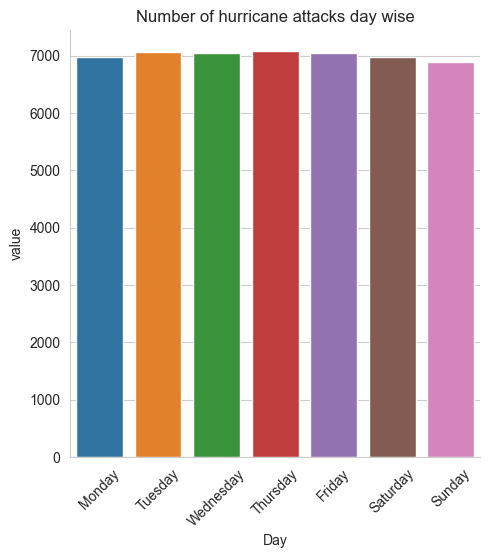

In [25]:
sns.set_style("whitegrid")
sns.catplot(data=hurricane_day,x="Day",y="value",kind="bar")
plt.xticks(rotation = 45)
plt.title("Number of hurricane attacks day wise")
sns.despine()
plt.show()

In [27]:
longitude_values = []

for i in df['Longitude']:
    longitude_values.append(i[:-1])

In [29]:
latitude_values = []

for i in df['Latitude']:
    latitude_values.append(i[:-1])

In [31]:
print(latitude_values)

['28.0', '28.0', '28.0', '28.1', '28.2', '28.2', '28.3', '28.4', '28.6', '29.0', '29.5', '30.0', '30.5', '31.0', '22.2', '12.0', '13.4', '13.7', '14.0', '14.4', '14.9', '15.4', '15.9', '16.1', '16.6', '16.9', '17.2', '17.6', '18.0', '18.4', '18.9', '19.4', '19.9', '20.5', '21.2', '21.9', '22.6', '23.2', '23.9', '24.4', '25.0', '25.6', '26.2', '26.8', '27.4', '28.0', '28.5', '29.6', '30.1', '30.7', '31.6', '32.5', '33.4', '34.0', '34.8', '35.8', '36.8', '37.8', '38.9', '40.0', '41.3', '42.8', '44.5', '46.4', '48.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '32.5', '28.7', '29.1', '29.5', '30.1', '30.7', '31.2', '31.6', '32.0', '32.7', '33.3', '34.0', '35.3', '37.0', '38.5', '40.2', '41.1', '42.0', '20.5', '20.7', '20.9', '21.1', '21.2', '21.5', '21.7', '21.9', '22.1', '22.2', '22.6', '22.9', '23.2', '23.5', '23.8', '24.2', '24.7', '25.2', '25.7', '26.2', '26.7', '27.2', '27.7', '28.2', '28.6', '28.8', '29.1',

In [35]:
import geopandas as gp

In [38]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")

fig = px.scatter_geo(df, locations="iso_alpha",size="pop")
fig.show()